In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !unzip /content/drive/MyDrive/BTL/archive.zip

In [ ]:
import os
import glob
import cv2
import numpy as np
path_happy = '/content/train/happy/*.jpg'
img_name_happy = glob.glob(path_happy)
img_name_happy.sort()
X_train=[]
happy_data = []
for file in img_name_happy:
  a = cv2.imread(file)
  happy_data.append(a)
  X_train.append(a)
  

happy_data=np.array(happy_data)

happy_lable=[]
for i in range (len(happy_data)):
  happy_lable.append(np.array([1, 0]))

In [ ]:
path_sad = '/content/train/sad/*.jpg'
img_name_sad = glob.glob(path_sad)
img_name_sad.sort()

sad_data = []
for file in img_name_sad:
  a = cv2.imread(file)
  sad_data.append(a)
  X_train.append(a)
  

sad_data=np.array(sad_data)

sad_lable=[]
for i in range (len(sad_data)):
  sad_lable.append(np.array([0, 1]))
  

In [ ]:
path_sad_test = '/content/test/sad/*.jpg'
img_name_sad_test = glob.glob(path_sad_test)
img_name_sad_test.sort()

sad_test_data = []
for file in img_name_sad_test:
  a = cv2.imread(file)
  sad_test_data.append(a)
  X_train.append(a)
  

sad_test_data=np.array(sad_test_data)

sad_test_lable=[]
for i in range (len(sad_test_data)):
  sad_test_lable.append(np.array([0, 1]))



In [ ]:
path_happy_test = '/content/test/happy/*.jpg'
img_name_happy_test = glob.glob(path_happy_test)
img_name_happy_test.sort()

happy_test_data = []
for file in img_name_happy_test:
  a = cv2.imread(file)
  happy_test_data.append(a)
  X_train.append(a)
  

happy_test_data=np.array(happy_test_data)

happy_test_lable=[]
for i in range (len(happy_test_data)):
  happy_test_lable.append(np.array([1, 0]))


In [ ]:
y_train=[]
X_train=(np.array(X_train))/255.

y_train=happy_lable + sad_lable + sad_test_lable + happy_test_lable
y_train=np.array(y_train)


In [ ]:
print(X_train.shape,y_train.shape)

(16610, 48, 48, 3) (16610, 2)


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.2, random_state=1)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(13288, 48, 48, 3)
(13288, 2)
(3322, 48, 48, 3)
(3322, 2)


In [ ]:
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.models import Model
batch_size = 16
img_height = 48
img_width = 48
num_classes=2
inp = Input(shape = (img_height, img_width, 3))
cnn = Conv2D(filters = 16, kernel_size = 3,padding='same', activation = 'relu') (inp)
pooling = MaxPooling2D((2,2)) (cnn)
drop=Dropout(0.2)(pooling)
cnn = Conv2D(filters = 32, kernel_size = 3, padding='same', activation = 'relu') (drop)
pooling = MaxPooling2D((2,2)) (cnn)
drop=Dropout(0.2)(pooling)
cnn = Conv2D(filters = 64, kernel_size = 3, padding='same', activation = 'relu') (drop)
pooling = MaxPooling2D((2,2)) (cnn)
drop=Dropout(0.2)(pooling)
f = Flatten()(drop)
fc1 = Dense(units = 128, activation = 'relu') (f)
out = Dense(units = num_classes, activation = 'softmax') (fc1)
model = Model(inputs = inp, outputs = out)
model.summary() 


Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 24, 24, 16)        0         
_________________________________________________________________
dropout (Dropout)            (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0     

In [ ]:
from keras.losses import CategoricalCrossentropy
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer =opt, metrics=['accuracy'])


In [ ]:
epochs = 50
history = model.fit(
  X_train,y_train,
  epochs=epochs,
  validation_data=(X_test,y_test)
)

Epoch 1/50
416/416 [==============================] - 34s 5ms/step - loss: 0.6280 - accuracy: 0.6396 - val_loss: 0.5372 - val_accuracy: 0.7267
Epoch 2/50
416/416 [==============================] - 2s 5ms/step - loss: 0.5015 - accuracy: 0.7511 - val_loss: 0.4221 - val_accuracy: 0.8104
Epoch 3/50
416/416 [==============================] - 2s 5ms/step - loss: 0.4398 - accuracy: 0.7894 - val_loss: 0.3859 - val_accuracy: 0.8305
Epoch 4/50
416/416 [==============================] - 2s 5ms/step - loss: 0.4062 - accuracy: 0.8096 - val_loss: 0.3664 - val_accuracy: 0.8429
Epoch 5/50
416/416 [==============================] - 2s 5ms/step - loss: 0.3817 - accuracy: 0.8191 - val_loss: 0.3303 - val_accuracy: 0.8636
Epoch 6/50
416/416 [==============================] - 2s 4ms/step - loss: 0.3568 - accuracy: 0.8345 - val_loss: 0.3244 - val_accuracy: 0.8627
Epoch 7/50
416/416 [==============================] - 2s 4ms/step - loss: 0.3401 - accuracy: 0.8446 - val_loss: 0.3015 - val_accuracy: 0.8727
Epoch

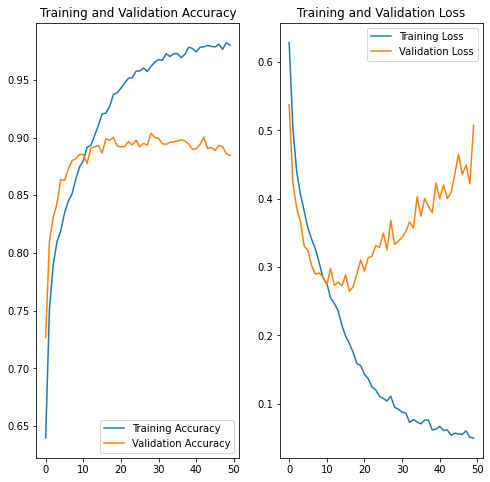

In [ ]:
import matplotlib.pyplot as plt

epochs = 50
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('model2classtestoverfitting.h5')
img=np.array(X_test[12])/255.
y_pre=model.predict(X_test)
y_pre[9]

array([3.7683974e-04, 9.9962318e-01], dtype=float32)

In [ ]:
y_test[9]

array([1, 0])

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

data_augmentation = keras.Model(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", 
                                                 input_shape=(img_height, 
                                                              img_width,
                                                              3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
inp = Input(shape = (img_height, img_width, 3))
cnn = Conv2D(filters = 16, kernel_size = 3,padding='same', activation = 'relu') (inp)
pooling = MaxPooling2D((2,2)) (cnn)
drop=Dropout(0.2)(pooling)
cnn = Conv2D(filters = 32, kernel_size = 3, padding='same', activation = 'relu') (drop)
pooling = MaxPooling2D((2,2)) (cnn)
drop=Dropout(0.2)(pooling)
cnn = Conv2D(filters = 64, kernel_size = 3, padding='same', activation = 'relu') (drop)
pooling = MaxPooling2D((2,2)) (cnn)
drop=Dropout(0.2)(pooling)
f = Flatten()(drop)
fc1 = Dense(units = 128, activation = 'relu') (f)
out = Dense(units = num_classes, activation = 'softmax') (fc1)
model = Model(inputs = inp, outputs = out)
model.summary() 

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 48, 48, 3)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 48, 48, 16)        448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 24, 24, 16)        0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 24, 24, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 24, 24, 32)        4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 12, 12, 32)        0   

In [ ]:
from keras.losses import CategoricalCrossentropy
import keras
opt = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', optimizer =opt, metrics=['accuracy'])


In [ ]:
epochs = 100
history = model.fit(
  X_train,y_train,
  epochs=epochs,
  validation_data=(X_test,y_test)
)

Epoch 1/100
416/416 [==============================] - 3s 5ms/step - loss: 0.6690 - accuracy: 0.5852 - val_loss: 0.5899 - val_accuracy: 0.6887
Epoch 2/100
416/416 [==============================] - 2s 4ms/step - loss: 0.5561 - accuracy: 0.7161 - val_loss: 0.4877 - val_accuracy: 0.7652
Epoch 3/100
416/416 [==============================] - 2s 4ms/step - loss: 0.4823 - accuracy: 0.7647 - val_loss: 0.4358 - val_accuracy: 0.7944
Epoch 4/100
416/416 [==============================] - 2s 5ms/step - loss: 0.4372 - accuracy: 0.7915 - val_loss: 0.3782 - val_accuracy: 0.8314
Epoch 5/100
416/416 [==============================] - 2s 5ms/step - loss: 0.4047 - accuracy: 0.8111 - val_loss: 0.3473 - val_accuracy: 0.8465
Epoch 6/100
416/416 [==============================] - 2s 4ms/step - loss: 0.3750 - accuracy: 0.8270 - val_loss: 0.3261 - val_accuracy: 0.8642
Epoch 7/100
416/416 [==============================] - 2s 4ms/step - loss: 0.3533 - accuracy: 0.8384 - val_loss: 0.3189 - val_accuracy: 0.8618

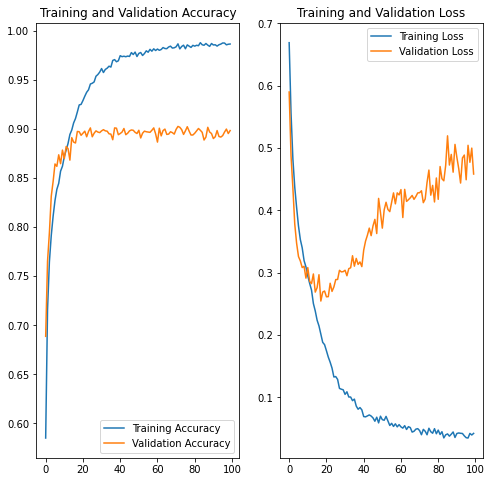

In [ ]:
import matplotlib.pyplot as plt

epochs = 100
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()